In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

from utils.metrics import aucroc
from utils.curves import learning_curve
from utils.estimators import DecisionTreeWrapper
from utils.base_set import X_train, y_train, seed

### Decision Tree

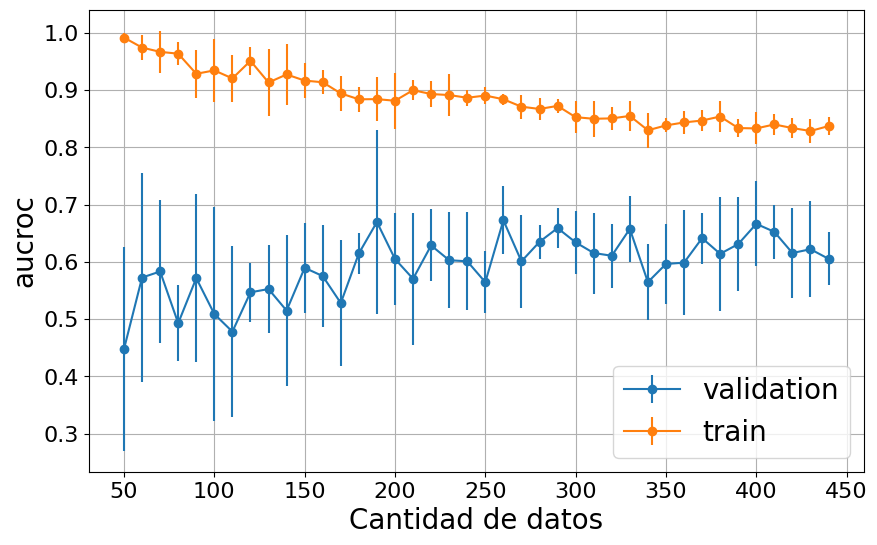

In [11]:
best_params = {'criterion': 'entropy', 'max_features': 135, 'max_depth': 3} # based on ej. 3
k = 5
n = X_train.shape[0]
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=seed)
fig, ax = plt.subplots(figsize=(10, 6))
mean_val_scores, _, _, _ = learning_curve(DecisionTreeWrapper(**best_params, random_state=seed),
                 range(50, n, 10),
                 X_train,
                 y_train,
                 aucroc,
                 True,
                 cv,
                 ax)
ax.legend(fontsize=20, loc='lower right')
ax.set_xlabel('Cantidad de datos', fontsize=20)
ax.set_ylabel('aucroc', fontsize=20)
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)
ax.grid(True)

In [13]:
max(mean_val_scores)

0.6725093370681605